In [2]:
pip install torch

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for torch from https://files.pythonhosted.org/packages/41/05/d540049b1832d1062510efc6829634b7fbef5394c757d8312414fb65a3cb/torch-2.4.1-cp310-cp310-manylinux1_x86_64.whl.metadata
  Obtaining dependency information for typing-extensions>=4.8.0 from https://files.pythonhosted.org/packages/26/9f/ad63fc0248c5379346306f8668cda6e2e2e9c95e01216d2b8ffd9ff037d0/typing_extensions-4.12.2-py3-none-any.whl.metadata
  Obtaining dependency information for nvidia-cuda-nvrtc-cu12==12.1.105 from https://files.pythonhosted.org/packages/b6/9f/c64c03f49d6fbc56196664d05dba14e3a561038a81a638eeb47f4d4cfd48/nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata
  Obtaining dependency information for nvidia-cuda-runtime-cu12==12.1.105 from https://files.pythonhosted.org/packages/eb/d5/c68b1d2cdfcc59e72e8a5949a37ddb22ae6cade80cd4a57a84d4c8b55472/nvidia_cuda_runtime_cu12-12.1.105-py3-non

In [3]:
import os
import json
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader

In [4]:
def get_filepaths(directory):
    filepaths = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            filepaths.append(os.path.join(root, file))
    return filepaths


In [5]:
class JSONDataset(Dataset):
    def __init__(self, file_paths):
        self.data = []
        for file_path in file_paths:
            with open(file_path, 'r') as f:
                file_content = f.read()
                # Split content by newlines (assuming each JSON object is on a new line)
                for json_obj in file_content.splitlines():
                    try:
                        file_data = json.loads(json_obj)
                        self.data.append(file_data)
                    except json.JSONDecodeError as e:
                        print(f"Error decoding JSON from {file_path}: {e}")
    def __getitem__(self, idx):
        # Get an item from the dataset based on the index
        item = self.data[idx]
        return item
    
    def __len__(self):
        return len(self.data)

In [6]:
directory = 'app/data/' 
file_paths = get_filepaths(directory)
json_dataset = JSONDataset(file_paths)

print(json_dataset[64])
print(len(json_dataset))

{'Link': 'https://learnenglishteens.britishcouncil.org/skills/reading/a1-reading/lost-dog', 'Transcript': 'LOST DOG\nSherry\n3 years old, male\nHelp us find our dog. Lost in Central Park near Blue Lake Café on Monday 10th June at 4 p.m.\n€500 Reward for safe return\n012 6554 7862', 'Label': 'A1 Elementary', 'Topic': 'pets'}
1103


In [8]:
df = pd.DataFrame(json_dataset.data)

In [13]:
df['Label'].value_counts()

B1 Intermediate          438
B2 Upper intermediate    247
A2 Pre-intermediate      157
A1 Elementary            149
C1 Advanced              104
Level not found            8
Name: Label, dtype: int64

KeyError: 'column_name'

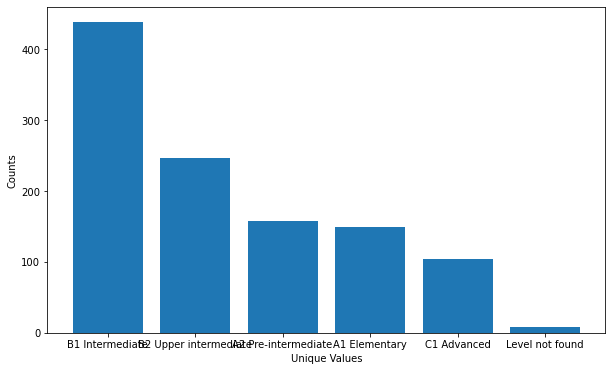

In [15]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'column_name' is the column you're interested in
unique_counts = df['Label'].value_counts()

# Plot the histogram
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.bar(unique_counts.index, unique_counts.values)

# Adding labels and title
plt.xlabel('Unique Values')
plt.ylabel('Counts')
plt.title(f'Histogram of Unique Counts in {df["column_name"].name}')

# Rotate the x l
